##### 생선의 무개와 크기로 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 ==> 분류 
- 학습 알고리즘(문제해결방법) : 최근접이웃알고리즘 개선

[1]데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
DATA_FILE='../data/fish.csv'
## - usecols로  사용할 만큼 불러오기 : Species, Weight, Length OR  0, 1, 2
fishDF=pd.read_csv(DATA_FILE,usecols=(0,1,2))
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [3]:
mask=(fishDF['Species']=='Bream')|(fishDF['Species']=='Smelt')
twoDF=fishDF[mask]
twoDF.reset_index(drop=True,inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [4]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
twoDF['S_code']=twoDF['Species'].replace({'Bream':0,'Smelt':1})

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_9140\3608636985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['S_code']=twoDF['Species'].replace({'Bream':0,'Smelt':1})


In [5]:
twoDF.head()

,Species,Weight,Length,S_code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


[2] 피쳐와 타겟 분리

In [6]:
features=twoDF[['Weight','Length']]
target=twoDF['S_code']

print(f'features.shape : {features.shape}, {features.ndim}D')
print(f'target.shape : {target.shape},{target.ndim}D')

features.shape : (49, 2), 2D
target.shape : (49,),1D


[3] 데이터셋준비 => 학습용,테스트용

In [7]:
from sklearn.model_selection import train_test_split

#train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,stratify=target,random_state=10)

In [8]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'Y_train : {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (39, 2), 2D
Y_train : (39,), 1D
X_test : (10, 2), 2D
Y_test : (10,), 1D


In [9]:
# target 0,1의 비율
print(Y_train.value_counts()[0]/Y_train.shape[0],Y_train.value_counts()[1]/Y_train.shape[0])
print(Y_test.value_counts()[0]/Y_test.shape[0],Y_test.value_counts()[1]/Y_test.shape[0])

0.717948717948718 0.28205128205128205
0.7 0.3


[3-2] 피쳐 스케일링

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
#스케일러 인스턴스 생성
nmScaler=MinMaxScaler()
nmScaler.fit(X_train)

MinMaxScaler()

In [12]:
nmScaler.min_,nmScaler.data_min_,nmScaler.scale_,nmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [13]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray타입 반환
X_train_scaled=nmScaler.transform(X_train)
X_train_scaled.shape

(39, 2)

In [14]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray타입 반환
X_test_scaled=nmScaler.transform(X_test)
X_test_scaled.shape
X_test_scaled.min()

0.0033222591362126247

[4] 훈련/학습 진행 
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# 학습인스턴스 생성
model=KNeighborsClassifier()

In [16]:
model.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [17]:
model.classes_,model.n_samples_fit_
# model.feature_names_in_   <==ndarray일 경우 컬럼명 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [18]:
model.score(X_test_scaled,Y_test)

1.0

[6] 최적의 K개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼 파라미터

In [21]:
# K의 범위 : 1~ 전체 데이터 개수

scores,point=[],[]
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors=k

    # 점수계산
    grade=model.score(X_test_scaled, Y_test)

    if k>1:
        if grade != scores[-1]:point.append(k)
    scores.append(grade)
point

[22]

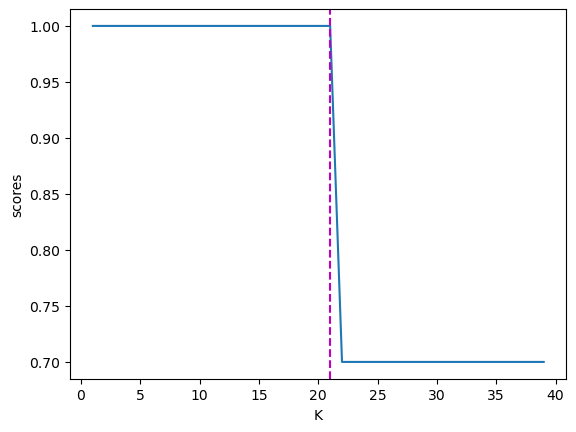

In [22]:
#x축 점수 k, y 축 점수
plt.plot(range(1,40),scores)
plt.xlabel('K')
plt.ylabel('scores')
plt.axvline(point[0]-1,0.0,1.0,color='m',linestyle='dashed')
plt.show()

[7] 예측 하기 ===> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [ ]:
new_data=pd.DataFrame([[413,27.8]],columns=['Weight','Length'])
new_data

,Weight,Length
0,413,27.8


In [ ]:
new_data_scaled=nmScaler.transform(new_data)

In [ ]:
model.predict(new_data_scaled)

array([0], dtype=int64)

In [ ]:
### 최근접한 kro 데이터 찾기
distance,index=model.kneighbors(new_data_scaled)
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703]])

In [ ]:
idx=index.reshape(-1).tolist()

In [ ]:
X_train_scaled[idx]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [ ]:
k_weight=X_train_scaled[idx][:,0]
k_length=X_train_scaled[idx][:,1]
print(k_weight,k_length,sep='\n')

[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


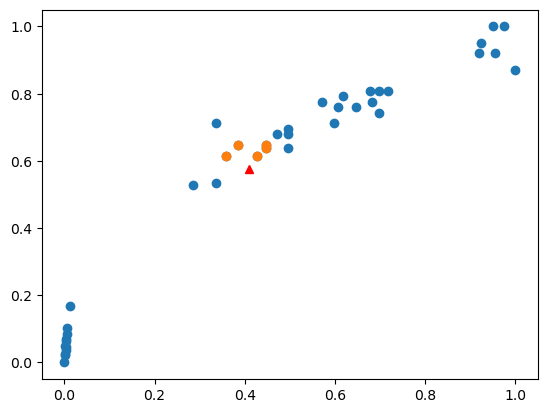

In [ ]:
### 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개의 피쳐(Weight,Lenght)로 종 분류 가능
#plt.scatter(twoDF.loc[:34,'Weight'],twoDF.loc[:34,'Length'])
#plt.scatter(twoDF.loc[35:,'Weight'],twoDF.loc[35:,'Length'])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])
plt.plot(new_data_scaled[0,0],new_data_scaled[0,1],'r^')
plt.scatter(k_weight,k_length)
plt.show()